### This jupyter notebook is to unit-test CFE model run

## Preparation

In [15]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [16]:
input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/forcing_daily_2014_2018.csv",
    "catchment_area_km2": 0.1210,
    "soil_params": {
        "bb": 8.17,
        "satdk": 2.45e-06,
        "slop": 1,
        "satpsi": 0.3,
        "smcmax": 0.8,
        "wltsmc": 0.35,
        "D": 2,
    },
    "max_gw_storage": 0.50,
    "Cgw": 1e-03,
    "expon": 1.75,
    "K_lf": 0.5,
    "K_nash": 0.3,
    "num_nash_storage": 2,
    "giuh_ordinates": [1.0],
    "trigger_z_fact": 0.5,
    "alpha_fc": 0.33,
    "refkdt": 3,
    "stand_alone": 1,
    "unit_test": 1,
    "time_step_size": 86400,
    "gw_scheme": "Exponential",
    "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/test_daily_2014_2018_sm_basinavg.csv",
}

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

1.1907365425326655
0.21167999999999998
0.5
GW converged <1% after warm-up iteration 2


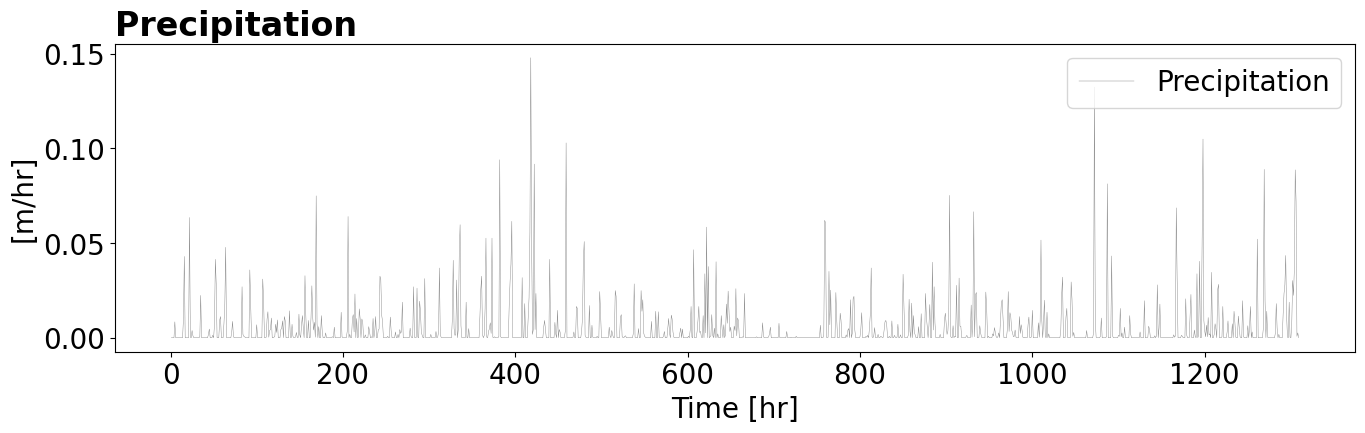

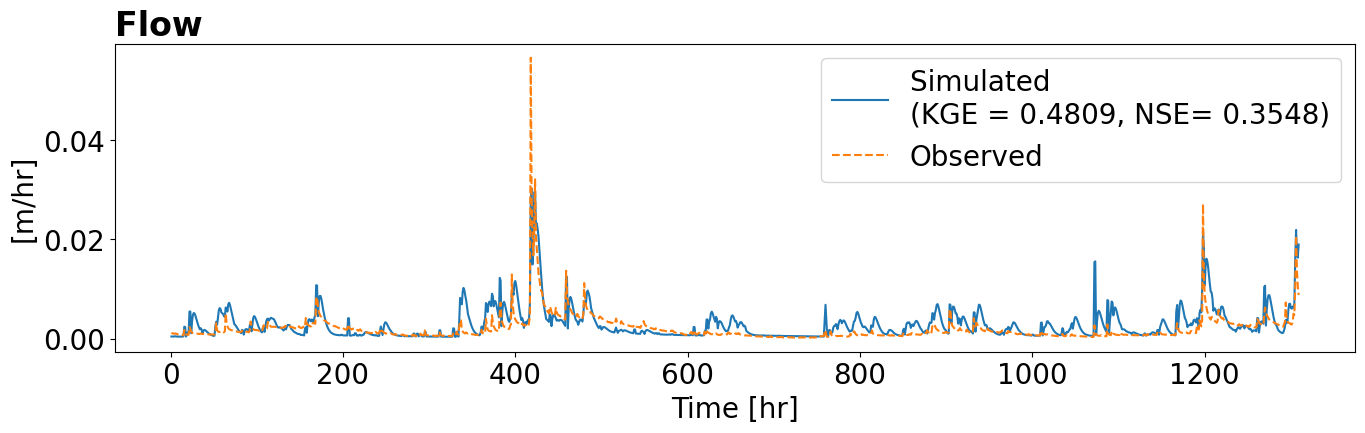

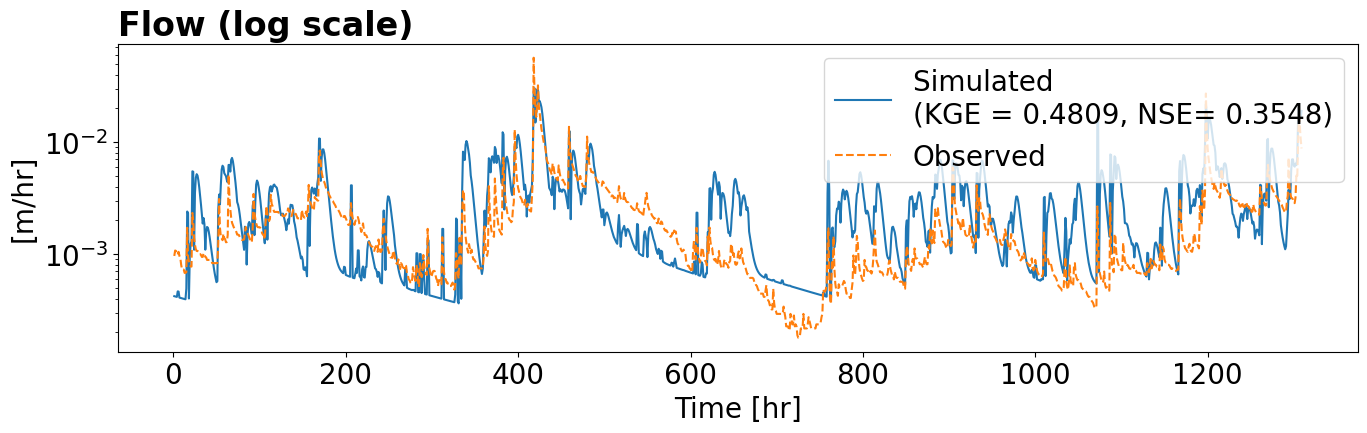

c:\Users\flipl\miniconda3\envs\CFE\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\flipl\miniconda3\envs\CFE\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


ZeroDivisionError: float division by zero

In [17]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(
    plot=True,
    print_fluxes=False,
    plot_lims=list(range(1, 1310)),
    warm_up=True,
    warmup_offset=300,
    warmup_iteration=10,
    verbose=True
)
cfe_instance.finalize(print_mass_balance=True)